### Class Excercise for this Assignment!

In [4]:
import tensorflow as tf

In [5]:
import tensorflow.keras.datasets as datasets

In [6]:
NUM_WORDS  = 10000

In [7]:
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=10000)


In [8]:
word_index = datasets.imdb.get_word_index()

In [ ]:
word_index.items()

In [10]:
for i, (key, index) in enumerate(word_index.items()):
    print(f'key:{key} --> index:{index}')
    if i == 20:
        break

key:fawn --> index:34701
key:tsukino --> index:52006
key:nunnery --> index:52007
key:sonja --> index:16816
key:vani --> index:63951
key:woods --> index:1408
key:spiders --> index:16115
key:hanging --> index:2345
key:woody --> index:2289
key:trawling --> index:52008
key:hold's --> index:52009
key:comically --> index:11307
key:localized --> index:40830
key:disobeying --> index:30568
key:'royale --> index:52010
key:harpo's --> index:40831
key:canet --> index:52011
key:aileen --> index:19313
key:acurately --> index:52012
key:diplomat's --> index:52013
key:rickman --> index:25242


In [10]:
reverse_word_index = dict( [(value, key) for (key,value) in word_index.items()])

In [12]:
for i , (index, key) in enumerate(reverse_word_index.items()):
    print(f'index: {index} --> key: {key}' )
    if i == 20:
        break


index: 34701 --> key: fawn
index: 52006 --> key: tsukino
index: 52007 --> key: nunnery
index: 16816 --> key: sonja
index: 63951 --> key: vani
index: 1408 --> key: woods
index: 16115 --> key: spiders
index: 2345 --> key: hanging
index: 2289 --> key: woody
index: 52008 --> key: trawling
index: 52009 --> key: hold's
index: 11307 --> key: comically
index: 40830 --> key: localized
index: 30568 --> key: disobeying
index: 52010 --> key: 'royale
index: 40831 --> key: harpo's
index: 52011 --> key: canet
index: 19313 --> key: aileen
index: 52012 --> key: acurately
index: 52013 --> key: diplomat's
index: 25242 --> key: rickman


In [13]:
sample = x_train[0]


In [14]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in sample])

In [15]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [16]:
len(sample)

218

In [17]:
len(x_train[1])

189

In [18]:
import numpy as np

In [19]:
np.zeros((2,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [20]:
def vectorize_sequences(sequences, dimention = NUM_WORDS):
    results = np.zeros((len(sequences), dimention))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
    return results

In [21]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [22]:
import matplotlib.pyplot as plt
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')


In [23]:
y_train[:10]

array([1., 0., 0., 1., 0., 0., 1., 0., 1., 0.], dtype=float32)

In [27]:
model = tf.keras.Sequential([tf.keras.layers.Dense(16,activation = 'relu'),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(16, activation = 'relu'),
                             tf.keras.layers.Dense(1, activation = 'sigmoid')])

In [28]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [32]:
x_val = x_train[:10000]
y_val = y_train[:10000]

x_train_partial = x_train[10000:]
y_train_partial = y_train[10000:]

In [33]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor ='val_loss', patience = 2), tf.keras.callbacks.TensorBoard()]

In [34]:
history = model.fit(x_train_partial, y_train_partial, epochs = 20, batch_size=512, validation_data = (x_val, y_val), callbacks = callbacks)

Epoch 1/20
30/30 [==============================] - 5s 113ms/step - loss: 0.5594 - accuracy: 0.7431 - val_loss: 0.4222 - val_accuracy: 0.8481
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3256 - accuracy: 0.8930 - val_loss: 0.3742 - val_accuracy: 0.8441
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2397 - accuracy: 0.9173 - val_loss: 0.3832 - val_accuracy: 0.8412
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1908 - accuracy: 0.9344 - val_loss: 0.2896 - val_accuracy: 0.8855
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1596 - accuracy: 0.9459 - val_loss: 0.2954 - val_accuracy: 0.8828
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1310 - accuracy: 0.9566 - val_loss: 0.2950 - val_accuracy: 0.8843


In [35]:

history_dict = history.history

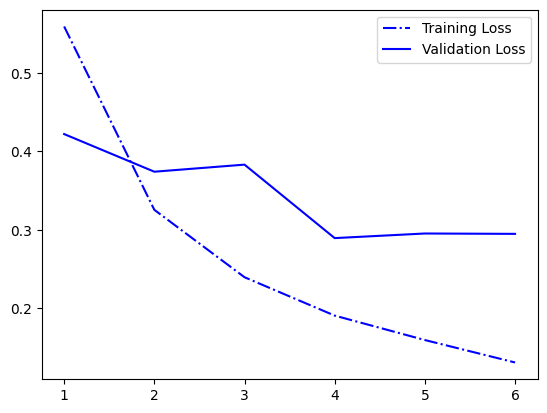

In [36]:

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epoches = range(1, len(loss_values) + 1)

plt.plot(epoches, loss_values, 'b-.', label='Training Loss')
plt.plot(epoches, val_loss_values, 'b-', label='Validation Loss')
plt.legend()
plt.show()

In [37]:
results = model.evaluate(x_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3170 - accuracy: 0.8760


In [38]:
results

[0.31702378392219543, 0.8759999871253967]

In [1]:
from imdb import Imdb
from reuters import Reuters
from boston_housing import BostonHousing

### Classification, Multi_class_classification and Regression

### 1. **Binary Classification: IMDB**

- **File**: `imdb.py`
- **Dataset**: IMDB dataset for binary sentiment classification (positive/negative).
- **Key Methods**:
  - `prepare_data()`: Prepares and vectorizes the dataset.
  - `build_model()`: Constructs a dense neural network.
  - `train()`: Trains the model with early stopping.
  - `plot_loss()`: Plots training and validation loss.
  - `plot_accuracy()`: Plots training and validation accuracy.
  - `evaluate()`: Evaluates the model on the test dataset, printing loss and accuracy.

---

### 2. **Multiclass Classification: Reuters**

- **File**: `reuters.py`
- **Dataset**: Reuters dataset for newswire topic classification (46 categories).
- **Key Methods**:
  - `prepare_data()`: Prepares and vectorizes the dataset. Converts labels to one-hot encoding.
  - `build_model()`: Constructs a dense neural network with softmax activation.
  - `train()`: Trains the model with early stopping.
  - `plot_loss()`: Plots training and validation loss.
  - `plot_accuracy()`: Plots training and validation accuracy.
  - `evaluate()`: Evaluates the model on the test dataset, printing loss and accuracy.

---

### 3. **Regression: Boston Housing**

- **File**: `boston_housing.py`
- **Dataset**: Boston Housing dataset for predicting house prices.
- **Key Methods**:
  - `prepare_data()`: Normalizes the dataset.
  - `build_model()`: Constructs a dense neural network for regression.
  - `train()`: Trains the model with early stopping.
  - `plot_loss()`: Plots training and validation loss.
  - `evaluate()`: Evaluates the model on the test dataset, printing loss and mean absolute error (MAE).

---

### 4. **Jupyter Notebook: Demonstrations**

- **File**: `module11.ipynb`
- **Purpose**: Demonstrates the implementation and results of the `Imdb`, `Reuters`, and `BostonHousing` classes.
- **Workflow**:
  1. Initialize each class.
  2. Prepare data for each task.
  3. Build, train, and evaluate the models.
  4. Plot the loss and accuracy/MAE.


Starting IMDB Binary Classification...
Preparing IMDB data...
Building IMDB model...
Training IMDB model...
Epoch 1/20
30/30 [==============================] - 3s 64ms/step - loss: 0.5431 - accuracy: 0.7703 - val_loss: 0.4339 - val_accuracy: 0.8332
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3411 - accuracy: 0.8905 - val_loss: 0.3213 - val_accuracy: 0.8812
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2497 - accuracy: 0.9172 - val_loss: 0.2859 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2042 - accuracy: 0.9311 - val_loss: 0.2867 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1701 - accuracy: 0.9453 - val_loss: 0.2878 - val_accuracy: 0.8840
Plotting IMDB training and validation loss...


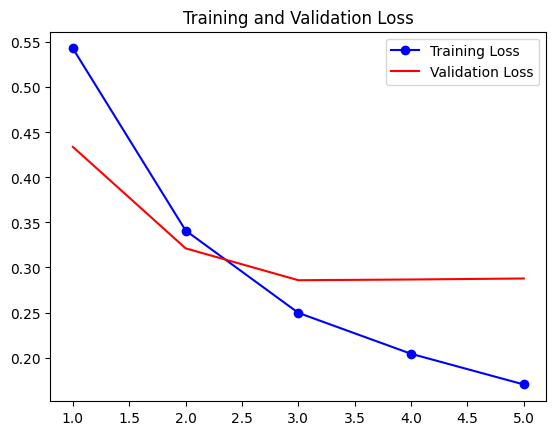

Plotting IMDB training and validation accuracy...


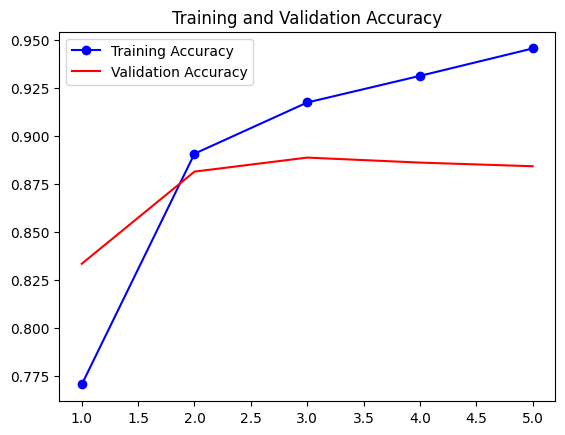

Evaluating IMDB model on the test set...
782/782 [==============================] - 1s 1ms/step - loss: 0.3067 - accuracy: 0.8735
Test Loss: 0.30672648549079895
Test Accuracy: 0.8734800219535828

Starting Reuters Multiclass Classification...
Preparing Reuters data...
Building Reuters model...
Training Reuters model...
Epoch 1/20
16/16 [==============================] - 1s 20ms/step - loss: 2.5878 - accuracy: 0.4878 - val_loss: 1.7119 - val_accuracy: 0.6280
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.4468 - accuracy: 0.6942 - val_loss: 1.3401 - val_accuracy: 0.7020
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.1273 - accuracy: 0.7583 - val_loss: 1.1940 - val_accuracy: 0.7350
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.9268 - accuracy: 0.7980 - val_loss: 1.0834 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.7642 - accuracy: 0.8359 - val_loss: 1.008

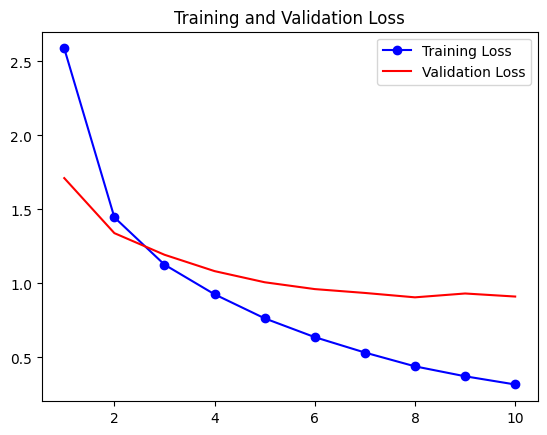

Plotting Reuters training and validation accuracy...


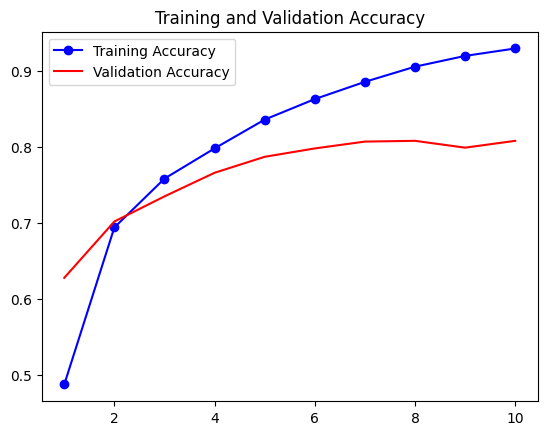

Evaluating Reuters model on the test set...
71/71 [==============================] - 0s 1ms/step - loss: 0.9609 - accuracy: 0.7858
Test Loss: 0.9609155654907227
Test Accuracy: 0.7858415246009827

Starting Boston Housing Regression...
Preparing Boston Housing data...
Building Boston Housing model...
Training Boston Housing model...
Epoch 1/20
19/19 [==============================] - 0s 6ms/step - loss: 550.7090 - mae: 21.6993 - val_loss: 462.5359 - val_mae: 19.4429
Epoch 2/20
19/19 [==============================] - 0s 2ms/step - loss: 440.6750 - mae: 19.0981 - val_loss: 346.3888 - val_mae: 16.5566
Epoch 3/20
19/19 [==============================] - 0s 2ms/step - loss: 317.9167 - mae: 15.7273 - val_loss: 221.6742 - val_mae: 12.7736
Epoch 4/20
19/19 [==============================] - 0s 2ms/step - loss: 193.3256 - mae: 11.5434 - val_loss: 111.6051 - val_mae: 8.2832
Epoch 5/20
19/19 [==============================] - 0s 2ms/step - loss: 105.5924 - mae: 7.6972 - val_loss: 57.4177 - val_mae

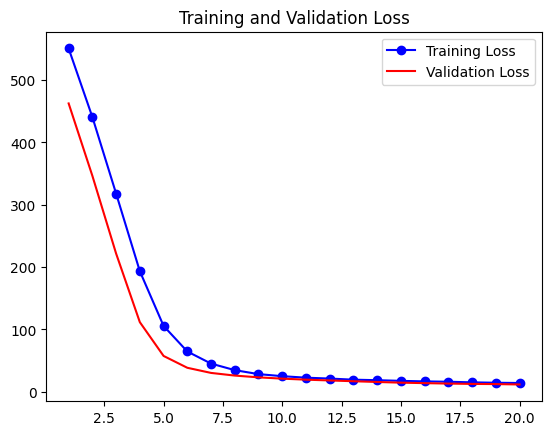

Evaluating Boston Housing model on the test set...
4/4 [==============================] - 0s 1ms/step - loss: 20.7089 - mae: 3.0715
Test Loss: 20.708877563476562
Test MAE: 3.0714666843414307


In [2]:
# IMDB Binary Classification
from imdb import Imdb
print("Starting IMDB Binary Classification...")
imdb = Imdb()

print("Preparing IMDB data...")
imdb.prepare_data()

print("Building IMDB model...")
imdb.build_model()

print("Training IMDB model...")
imdb.train()

print("Plotting IMDB training and validation loss...")
imdb.plot_loss()

print("Plotting IMDB training and validation accuracy...")
imdb.plot_accuracy()

print("Evaluating IMDB model on the test set...")
imdb.evaluate()

# Reuters Multiclass Classification
from reuters import Reuters
print("\nStarting Reuters Multiclass Classification...")
reuters = Reuters()

print("Preparing Reuters data...")
reuters.prepare_data()

print("Building Reuters model...")
reuters.build_model()

print("Training Reuters model...")
reuters.train()

print("Plotting Reuters training and validation loss...")
reuters.plot_loss()

print("Plotting Reuters training and validation accuracy...")
reuters.plot_accuracy()

print("Evaluating Reuters model on the test set...")
reuters.evaluate()

# Boston Housing Regression
from boston_housing import BostonHousing
print("\nStarting Boston Housing Regression...")
boston = BostonHousing()

print("Preparing Boston Housing data...")
boston.prepare_data()

print("Building Boston Housing model...")
boston.build_model()

print("Training Boston Housing model...")
boston.train()

print("Plotting Boston Housing training and validation loss...")
boston.plot_loss()

print("Evaluating Boston Housing model on the test set...")
boston.evaluate()
